**Fraud Detection System**

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [4]:
df = df.dropna()

In [5]:
df.duplicated().sum()

np.int64(0)

* The dataset contains no missing values in critical numerical or categorical fields.

* Therefore, no imputation was required, avoiding the risk of introducing bias.



* The outliers were not removed, because:

* They represent large fraudulent transfers.



In [6]:
df["balance_diff_org"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["hour"] = df["step"] % 24

In [7]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff_org,hour
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,9839.64,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,1864.28,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,181.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,181.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,11668.14,1
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,7817.71,1
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,7107.77,1
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,7861.64,1
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,2671.00,1
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,5337.77,1


In [8]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
df['PAYMENT'] = df['type'].apply(lambda x: 1 if x == 'PAYMENT' else 0)
df['TRANSFER'] = df['type'].apply(lambda x: 1 if x == 'TRANSFER' else 0)
df['CASH_OUT'] = df['type'].apply(lambda x: 1 if x == 'CASH_OUT' else 0)
df['CASH_IN'] = df['type'].apply(lambda x: 1 if x == 'CASH_IN' else 0)

In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff_org,hour,PAYMENT,TRANSFER,CASH_OUT,CASH_IN
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,1,1,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,1,1,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,1,0,1,0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,1,0,0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,1,1,0,0,0


In [11]:
df = df.drop(df[['nameOrig','nameDest','isFlaggedFraud','type']],axis=1)

In [12]:
X = df.drop(df[['isFraud']],axis=1)
y = df['isFraud']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Model Used**

XGBoost Classifier

Handles:

* Severe class imbalance

* Nonlinear relationships

* Multicollinearity

* Outliers

In [14]:
!pip install xgboost

In [15]:
from xgboost import XGBClassifier

In [16]:
model_1 = XGBClassifier(
    objective="binary:logistic",
    eval_metric="aucpr",
    n_estimators=500,
    max_depth=7,
    learning_rate=0.05,
    random_state=42
)

model_1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [17]:
y_pred = model_1.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, average_precision_score, recall_score, precision_recall_curve,precision_score,classification_report

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9998168993276355
Recall: 0.8845679012345679
Precision: 0.9688979039891819

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.88      0.92      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.94      0.96   1272524
weighted avg       1.00      1.00      1.00   1272524



In [20]:
probs = model_1.predict_proba(X)[:, 1]
precision, recall, _ = precision_recall_curve(y, probs)
ap = average_precision_score(y, probs)

In [21]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


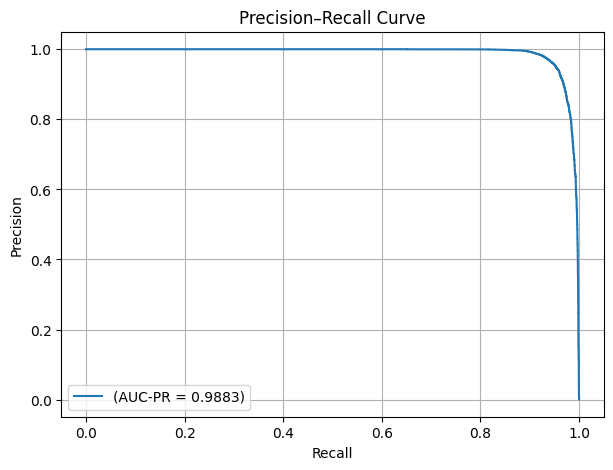

In [22]:
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f"(AUC-PR = {ap:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

Key Metrics :

* Precision

* Recall

* F1-score

* AUC-PR

Interpretation

~88.5% of fraud cases detected

Only ~3% false fraud alerts



---


The most important predictors are:

Transaction Amount

Balance Difference (Origin Account)

Transaction Type (TRANSFER, CASH_OUT)

Time of Transaction (Night Hours)